In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from astroML.plotting import hist
np.random.seed(42)
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
%matplotlib inline

In [98]:
 ### Modeled after AstroML book figure 10.25
## burst model replaced by gaussian profile

#----------------------------------------------------------------------
# Set up toy dataset
def GaussAndBkgd(t, b0, A, sigW, T):
    """Gaussian profile + flat background model"""
    y = np.empty(t.shape)
    y.fill(b0)
    y += A * np.exp(-(t - T)**2/2/sigW**2)
    return y

#np.random.seed(42)
N = 101
b0_true = 10
A_true = 3
sigma_true = 3.0
T_true = 40
err0_y = 0.5

t = 100 * np.random.random(N)
y_true = GaussAndBkgd(t, b0_true, A_true, sigma_true, T_true)
err_y = np.random.uniform(0, 2*err0_y) + 0.5*np.sqrt(y_true/10) 
y_obs = np.random.normal(y_true, err_y)
#----------------------------------------------------------------------

[ 10.01279234   3.           2.96439959  40.        ]


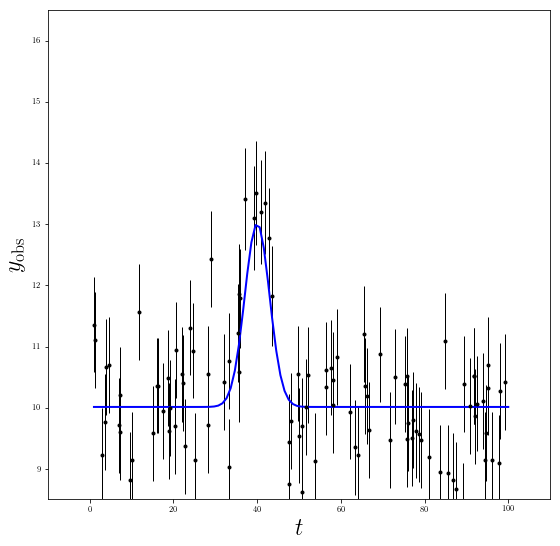

In [109]:
Model = y_obs
Err = err_y
t_fit = np.linspace(1,100,101)

def NegLogL(Params):
    Data = GaussAndBkgd(t_fit, Params[0], Params[1], Params[2], Params[3])
    return(np.sum((Model-Data/Er2**2)))

InitialGuess = [10,3,3,40]
Opt = minimize(LogL,InitialGuess,bounds=((0.1, None), (3, None),(1, 3), (40, None)))
y_fit = GaussAndBkgd(t_fit, Opt.x[0], Opt.x[1], Opt.x[2], Opt.x[3])
print(Opt.x)
ChiSq = np.sum(((y_obs-y_fit)/err_y)**2)

plt.figure(figsize=[9,9])
plt.plot(t_fit,y_fit,lw=2,c='b')
plt.scatter(t, y_obs, s=9, lw=0, c='k')
plt.errorbar(t, y_obs, err_y, fmt='.', lw=1, c='k')
plt.xlim(-10, 110)
plt.ylim(8.5, 16.5)
plt.xlabel('$t$',fontsize=24)
plt.ylabel(r'$y_{\rm obs}$',fontsize=24)